<a href="https://colab.research.google.com/github/AbelEsther/CampusGuard-AI/blob/main/CampusGuard_AI_group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://universe.roboflow.com/yolov7test-u13vc/weapon-detection-m7qso/dataset/16

#Project: CampusGuard-AI
## Team 6: Aishwarya Jadeja, Dhrushi Padma, Esther Abel, Haarika Atluri, Nayana Hegde


In [1]:
# github repo link : https://github.com/AbelEsther/CampusGuard-AI

In [2]:
# ✅ STEP 1: Mount Google Drive & Unzip Dataset
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path = '/content/drive/My Drive/content/weapon-detection.v16-remapped-train-80-val-20.yolov8.zip'
extract_dir = '/content/weapon_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)


Mounted at /content/drive


['README.roboflow.txt',
 'export',
 'train',
 'valid',
 'data.yaml',
 'README.dataset.txt']

In [3]:
# ✅ STEP 2: Install YOLOv8
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [4]:
# ✅ STEP 3: Create data.yaml
data_yaml = """
train: /content/weapon_dataset/train/images
val: /content/weapon_dataset/valid/images

nc: 2
names: ['gun', 'knife']
"""

with open('/content/weapon_dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

In [5]:
# ✅ STEP 4: Train the YOLOv8 Model
from ultralytics import YOLO

model = YOLO('yolov8s.yaml')  # Or 'yolov8s.yaml' for better performance
model.train(data='/content/weapon_dataset/data.yaml', epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/weapon_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 17.0±4.9 MB/s, size: 34.6 KB)


train: Scanning /content/weapon_dataset/train/labels... 10900 images, 7 backgrounds, 13 corrupt: 100%|██████████| 10900/10900 [00:14<00:00, 755.15it/s] 

train: WARNING ⚠️ /content/weapon_dataset/train/images/heavy_weapon-495-_jpg.rf.022325e0a5924c02545a5b9fbe412778.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/weapon_dataset/train/images/heavy_weapon-495-_jpg.rf.8b4d4363ecea1564de76560d53c5eea3.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/weapon_dataset/train/images/heavy_weapon-498-_jpg.rf.5999c267da9ea0f21ce4c74a20170988.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/weapon_dataset/train/images/heavy_weapon-498-_jpg.rf.e8e55acdd07fbeefde5ba8243b03b0ad.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/weapon_dataset/train/images/heavy_weapon-520-_jpg.rf.5dd5eaf127d2a2e85b3bbd93bb54

train: New cache created: /content/weapon_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.7±2.7 MB/s, size: 38.9 KB)


val: Scanning /content/weapon_dataset/valid/labels... 1491 images, 172 backgrounds, 195 corrupt: 100%|██████████| 1491/1491 [00:02<00:00, 618.61it/s]

val: WARNING ⚠️ /content/weapon_dataset/valid/images/NV_584-0050_jpg.rf.578abc28166b3acf3372a4552b4221c3.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/weapon_dataset/valid/images/heavy_weapon-512-_jpg.rf.94cd16caa78129fb2d6ab9203edb26f7.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/weapon_dataset/valid/images/rgb-000000_jpg.rf.2553ea4d6d3a230e78718f8842e39641.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/weapon_dataset/valid/images/rgb-00000100_jpg.rf.c1792a7dd8245024ba168de9c22c2412.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/weapon_dataset/valid/images/rgb-00000104_jpg.rf.b8b47c1232411a4bfcecca9d7e5c4448.jpg: ignoring corrupt image/

val: New cache created: /content/weapon_dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.03G      2.798      3.503      3.444         17        640: 100%|██████████| 681/681 [03:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]


                   all       1296       1315      0.582     0.0745     0.0354    0.00922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.52G      1.978       2.67      2.439         21        640: 100%|██████████| 681/681 [03:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  4.04it/s]


                   all       1296       1315      0.454      0.218      0.214     0.0939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.53G      1.785      2.412      2.216         15        640: 100%|██████████| 681/681 [03:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.75it/s]


                   all       1296       1315      0.506      0.297      0.287      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.55G       1.69      2.267      2.114         18        640: 100%|██████████| 681/681 [03:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.73it/s]


                   all       1296       1315        0.6      0.348       0.37      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.57G      1.616      2.139      2.019         19        640: 100%|██████████| 681/681 [03:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.78it/s]


                   all       1296       1315      0.562      0.341      0.397      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.58G       1.56      2.038      1.957         11        640: 100%|██████████| 681/681 [03:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.17it/s]


                   all       1296       1315      0.572      0.374      0.415      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.6G      1.521       1.96      1.926         16        640: 100%|██████████| 681/681 [03:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.78it/s]


                   all       1296       1315      0.673       0.43       0.47      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.62G       1.48      1.886       1.88         13        640: 100%|██████████| 681/681 [03:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.78it/s]


                   all       1296       1315      0.702      0.438      0.495      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.63G      1.442      1.822      1.842         25        640: 100%|██████████| 681/681 [03:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.75it/s]


                   all       1296       1315      0.774      0.454      0.513      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.65G      1.415      1.779      1.813         12        640: 100%|██████████| 681/681 [03:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.80it/s]


                   all       1296       1315      0.778      0.465      0.537      0.322
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.66G       1.43      1.554      1.906         12        640: 100%|██████████| 681/681 [02:53<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.88it/s]


                   all       1296       1315      0.781      0.503      0.584      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.69G      1.364      1.452      1.851          8        640: 100%|██████████| 681/681 [02:52<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.96it/s]

                   all       1296       1315      0.776       0.51      0.595      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.7G      1.324      1.376      1.811          8        640: 100%|██████████| 681/681 [02:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.81it/s]


                   all       1296       1315      0.768      0.534      0.612      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.72G      1.297      1.327      1.784          7        640: 100%|██████████| 681/681 [02:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.81it/s]


                   all       1296       1315      0.839      0.544      0.646      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.73G      1.265      1.279      1.754          7        640: 100%|██████████| 681/681 [02:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.79it/s]


                   all       1296       1315      0.859      0.538      0.642      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.76G       1.24       1.22      1.728          9        640: 100%|██████████| 681/681 [02:50<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.96it/s]


                   all       1296       1315      0.878      0.533       0.65       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.77G       1.22      1.179      1.706          7        640: 100%|██████████| 681/681 [02:52<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:09<00:00,  4.19it/s]

                   all       1296       1315      0.796      0.573      0.661      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.79G       1.19      1.139      1.679          7        640: 100%|██████████| 681/681 [02:50<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.82it/s]


                   all       1296       1315      0.849      0.576      0.672      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.8G      1.165      1.105      1.661         10        640: 100%|██████████| 681/681 [02:50<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.76it/s]


                   all       1296       1315      0.879      0.576      0.687      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.82G      1.141      1.072      1.636          7        640: 100%|██████████| 681/681 [02:51<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.79it/s]


                   all       1296       1315      0.852      0.599      0.685      0.453

20 epochs completed in 1.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]


                   all       1296       1315      0.879      0.576      0.687      0.454
                   gun        362        396      0.905      0.444       0.55      0.336
                 knife        778        919      0.853      0.707      0.824      0.571
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bec63314cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [37]:
# ✅ STEP 5: Capture an Image with Webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_filename = take_photo()
print(f"📸 Photo saved as {photo_filename}")

<IPython.core.display.Javascript object>

📸 Photo saved as photo.jpg



image 1/1 /content/photo.jpg: 480x640 1 gun, 10.0ms
Speed: 1.5ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
🔫 Harmful Object detected in the image!


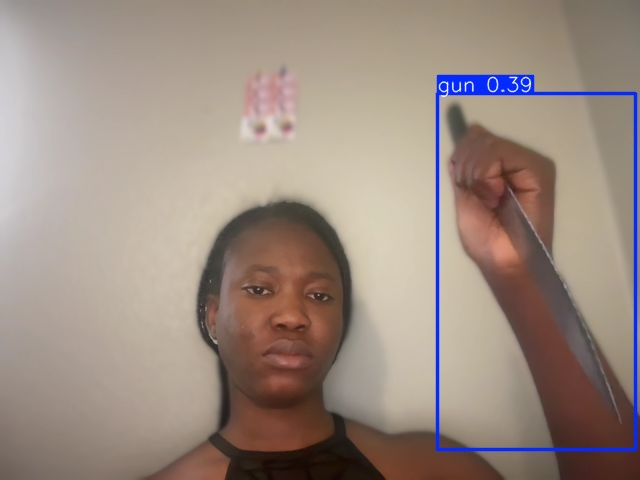

In [38]:
import shutil
from ultralytics import YOLO
from IPython.display import Image as ColabImage

# Load the trained YOLOv8 model
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# ✅ Clean up previous predictions (optional but recommended)
shutil.rmtree('/content/runs/detect/predict2', ignore_errors=True)

# ✅ Run inference and save in custom folder
results = model(photo_filename, save=True, project='runs/detect', name='predict2', exist_ok=True)

# ✅ Check if any object was detected
boxes = results[0].boxes

if boxes is not None and len(boxes) > 0:
    print("🔫 Harmful Object detected in the image!")
else:
    print("✅ No Harmful Object detected in the image.")

# ✅ Show the saved result
ColabImage('/content/runs/detect/predict2/photo.jpg')
